In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('file.csv')

# Data preprocessing
stop_words = set(stopwords.words('english'))
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['labels'], test_size=0.2, random_state=42)

In [6]:
# Sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'neutral'
    else:
        return 'negative'

In [7]:
# Make predictions on the test set
y_pred = X_test.apply(analyze_sentiment)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Convert the classification report into a DataFrame
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

Classification Report:
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00     21474
        good       0.00      0.00      0.00     11204
    negative       0.00      0.00      0.00         0
     neutral       0.24      0.14      0.17     11181
    positive       0.00      0.00      0.00         0

    accuracy                           0.03     43859
   macro avg       0.05      0.03      0.03     43859
weighted avg       0.06      0.03      0.04     43859



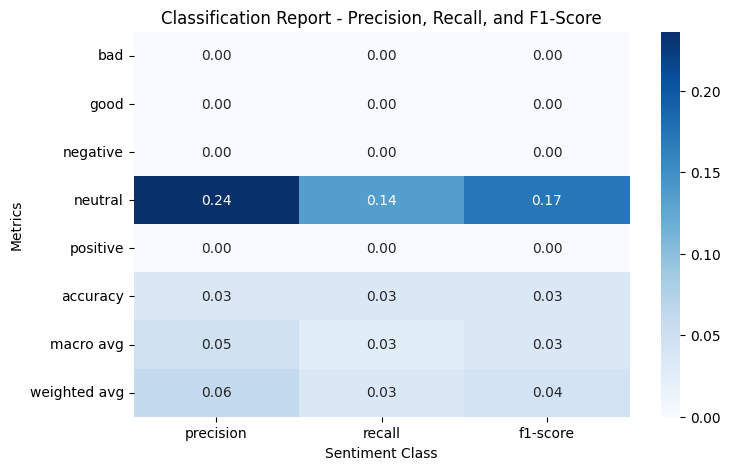

In [8]:
# Plot the classification report as a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report - Precision, Recall, and F1-Score')
plt.xlabel('Sentiment Class')
plt.ylabel('Metrics')
plt.show()